In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import os
os.chdir("/content/gdrive/My Drive/cifar-10-cnn-tf")
os.listdir()


['cifar-10-batches-py', 'cifar-10-python.tar.gz', '0.ipynb']

In [3]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [4]:
import tensorflow as tf
print(tf.__version__)

1.15.2


In [6]:
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

--2020-04-29 13:01:15--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  52.7MB/s    in 3.1s    

2020-04-29 13:01:18 (52.7 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [8]:
!tar -zxvf cifar-10-python.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [5]:
!ls


0.ipynb  cifar-10-batches-py  cifar-10-python.tar.gz


In [0]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'  

gpuConfig = tf.ConfigProto(allow_soft_placement=True)
gpuConfig.gpu_options.allow_growth = True  

In [0]:
import _pickle as pickle
import numpy as np

In [8]:
def unpickle(filename):
    with open(filename, 'rb') as f:
        d = pickle.load(f, encoding='latin1')
        return d

def onehot(labels):
    '''one-hot 编码'''
    n_sample = len(labels)
    n_class = max(labels) + 1
    onehot_labels = np.zeros((n_sample, n_class))
    onehot_labels[np.arange(n_sample), labels] = 1
    return onehot_labels

# 训练数据集
data1 = unpickle('cifar-10-batches-py/data_batch_1')
data2 = unpickle('cifar-10-batches-py/data_batch_2')
data3 = unpickle('cifar-10-batches-py/data_batch_3')
data4 = unpickle('cifar-10-batches-py/data_batch_4')
data5 = unpickle('cifar-10-batches-py/data_batch_5')
X_train = np.concatenate((data1['data'], data2['data'], data3['data'], data4['data'], data5['data']), axis=0)
y_train = np.concatenate((data1['labels'], data2['labels'], data3['labels'], data4['labels'], data5['labels']), axis=0)
y_train = onehot(y_train)
# 测试数据集
test = unpickle('cifar-10-batches-py/test_batch')
X_test = test['data'][:5000, :]
y_test = onehot(test['labels'])[:5000, :]

print('Training dataset shape:', X_train.shape)
print('Training labels shape:', y_train.shape)
print('Testing dataset shape:', X_test.shape)
print('Testing labels shape:', y_test.shape)

Training dataset shape: (50000, 3072)
Training labels shape: (50000, 10)
Testing dataset shape: (5000, 3072)
Testing labels shape: (5000, 10)


In [0]:
learning_rate = 1e-3
training_iters = 200
batch_size = 50
display_step = 5
n_features = 3072  # 32*32*3
n_classes = 10
n_fc1 = 384
n_fc2 = 192


In [0]:
import time
import matplotlib.pyplot as plt

12344
0.28
time:  8.880178689956665
---------------%d onpech is finished------------------- 0
0.34
time:  8.80775237083435
---------------%d onpech is finished------------------- 1
0.34
time:  8.782991647720337
---------------%d onpech is finished------------------- 2
0.28
time:  8.782162189483643
---------------%d onpech is finished------------------- 3
0.32
time:  8.81440806388855
---------------%d onpech is finished------------------- 4
0.36
time:  8.807639122009277
---------------%d onpech is finished------------------- 5
0.32
time:  8.84340238571167
---------------%d onpech is finished------------------- 6
0.28
time:  8.823658227920532
---------------%d onpech is finished------------------- 7
0.34
time:  8.824474811553955
---------------%d onpech is finished------------------- 8
0.32
time:  8.814513921737671
---------------%d onpech is finished------------------- 9
0.36
time:  8.79977798461914
---------------%d onpech is finished------------------- 10
0.36
time:  8.818164110183716

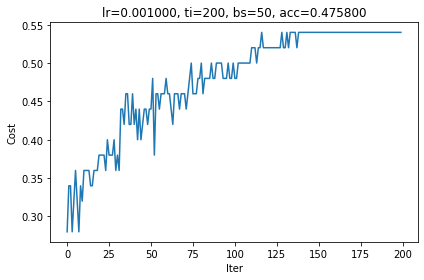

In [13]:
# 构建模型
x = tf.placeholder(tf.float32, [None, n_features])
y = tf.placeholder(tf.float32, [None, n_classes])

W_conv = {
    'conv1': tf.Variable(tf.truncated_normal([5, 5, 3, 32], stddev=0.0001)),
    'conv2': tf.Variable(tf.truncated_normal([5, 5, 32, 64],stddev=0.01)),
    'fc1': tf.Variable(tf.truncated_normal([8*8*64, n_fc1], stddev=0.1)),
    'fc2': tf.Variable(tf.truncated_normal([n_fc1, n_fc2], stddev=0.1)),
    'fc3': tf.Variable(tf.truncated_normal([n_fc2, n_classes], stddev=0.1))
}
b_conv = {
    'conv1': tf.Variable(tf.constant(0.0, dtype=tf.float32, shape=[32])),
    'conv2': tf.Variable(tf.constant(0.1, dtype=tf.float32, shape=[64])),
    'fc1': tf.Variable(tf.constant(0.1, dtype=tf.float32, shape=[n_fc1])),
    'fc2': tf.Variable(tf.constant(0.1, dtype=tf.float32, shape=[n_fc2])),
    'fc3': tf.Variable(tf.constant(0.0, dtype=tf.float32, shape=[n_classes]))
}

x_image = tf.reshape(x, [-1, 32, 32, 3])
# 卷积层 1
conv1 = tf.nn.conv2d(x_image, W_conv['conv1'], strides=[1, 1, 1, 1], padding='SAME')
conv1 = tf.nn.bias_add(conv1, b_conv['conv1'])
conv1 = tf.nn.relu(conv1)
# 池化层 1
pool1 = tf.nn.avg_pool(conv1, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME')
# LRN层，Local Response Normalization
norm1 = tf.nn.lrn(pool1, 4, bias=1.0, alpha=0.001/9.0, beta=0.75)
# 卷积层 2
conv2 = tf.nn.conv2d(norm1, W_conv['conv2'], strides=[1, 1, 1, 1], padding='SAME')
conv2 = tf.nn.bias_add(conv2, b_conv['conv2'])
conv2 = tf.nn.relu(conv2)
# LRN层，Local Response Normalization
norm2 = tf.nn.lrn(conv2, 4, bias=1.0, alpha=0.001/9.0, beta=0.75)
# 池化层 2
pool2 = tf.nn.avg_pool(norm2, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME')
reshape = tf.reshape(pool2, [-1, 8*8*64])

fc1 = tf.add(tf.matmul(reshape, W_conv['fc1']), b_conv['fc1'])
fc1 = tf.nn.relu(fc1)
# 全连接层 2
fc2 = tf.add(tf.matmul(fc1, W_conv['fc2']), b_conv['fc2'])
fc2 = tf.nn.relu(fc2)
# 全连接层 3, 即分类层
fc3 = tf.nn.softmax(tf.add(tf.matmul(fc2, W_conv['fc3']), b_conv['fc3']))

# 定义损失
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=fc3, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)
# 评估模型
correct_pred = tf.equal(tf.argmax(fc3, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

init = tf.global_variables_initializer()
print("12344")

with tf.Session(config=gpuConfig) as sess:
    sess.run(init)
    c = []
    total_batch = int(X_train.shape[0] / batch_size)
#    for i in range(training_iters):
    start_time = time.time()
    for i in range(200):
        for batch in range(total_batch):
            batch_x = X_train[batch*batch_size : (batch+1)*batch_size, :]
            batch_y = y_train[batch*batch_size : (batch+1)*batch_size, :]
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        acc = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y})
        print(acc)
        c.append(acc)
        end_time = time.time()
        print('time: ', (end_time - start_time))
        start_time = end_time
        print("---------------%d onpech is finished-------------------",i)
    print("Optimization Finished!")

    # Test
    test_acc = sess.run(accuracy, feed_dict={x: X_test, y: y_test})
    print("Testing Accuracy:", test_acc)
    plt.plot(c)
    plt.xlabel('Iter')
    plt.ylabel('Cost')
    plt.title('lr=%f, ti=%d, bs=%d, acc=%f' % (learning_rate, training_iters, batch_size, test_acc))
    plt.tight_layout()
    plt.savefig('cnn-tf-cifar10-%s.png' % test_acc, dpi=200)